## スカラ計算

In [16]:
import tensorflow as tf

a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print(sess.run(c))

2


In [17]:
import tensorflow as tf
a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

print(c)

Tensor("add_1:0", shape=(), dtype=int32)


In [18]:
import tensorflow as tf
a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
print(graph.as_graph_def())

node {
  name: "init"
  op: "NoOp"
}
node {
  name: "init_1"
  op: "NoOp"
}
node {
  name: "init_2"
  op: "NoOp"
}
node {
  name: "init_3"
  op: "NoOp"
}
node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "a_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
    

In [19]:
import tensorflow as tf

a = tf.Variable(1, name='a')
b = tf.constant(1, name='b')
c = tf.assign(a, a + b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('一回目：[c, a] =', sess.run([c, a]))
    # 変数 c が更新されている
    print('二回目：[c, a] =', sess.run([c, a]))

一回目：[c, a] = [2, 2]
二回目：[c, a] = [3, 3]


In [20]:
import tensorflow as tf


a = tf.placeholder(dtype=tf.int32, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print('a + b =', sess.run(c, feed_dict={a: 1}))

a + b = 2


In [21]:
import tensorflow as tf


a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b) #a + bと等価
d = tf.multiply(a, b) #a * bと等価

with tf.Session() as sess:
    print('a + b =', sess.run(c))
    print('a * b =', sess.run(d))

a + b = 5
a * b = 6


## テンソル計算

In [22]:
import tensorflow as tf


a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
c = a + b

with tf.Session() as sess:
    print('a + b = ', sess.run(c))

a + b =  [5 7 9]


In [23]:
import tensorflow as tf


a = tf.constant([[1, 2], [3, 4]], name='a')
b = tf.constant([[1], [2]], name='b')
c = tf.matmul(a, b)

print('shape of a: ', a.shape)
print('shape of b: ', b.shape)
print('shape of c: ', c.shape)

with tf.Session() as sess:
    print('a = \n', sess.run(a))
    print('b = \n', sess.run(b))
    print('c = \n', sess.run(c))

shape of a:  (2, 2)
shape of b:  (2, 1)
shape of c:  (2, 1)
a = 
 [[1 2]
 [3 4]]
b = 
 [[1]
 [2]]
c = 
 [[ 5]
 [11]]


## tensor演算とプレースホルダー

In [24]:
import tensorflow as tf


a = tf.placeholder(shape=(None, 2), dtype=tf.int32, name='a')

with tf.Session() as sess:
    print('-- [[1, 2]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2]]}))
    print('\n-- [[1, 2], [3, 4]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2], [3, 4]]}))

-- [[1, 2]]を代入 --
a =  [[1 2]]

-- [[1, 2], [3, 4]]を代入 --
a =  [[1 2]
 [3 4]]


## Saver

In [25]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('1回目 b = ', sess.run(b))
    print('2回目 b = ', sess.run(b))
    
# セッションが変わると元の値に戻ってしまう
with tf.Session() as sess:
    print('-- 新しいセッション --')
    sess.run(tf.global_variables_initializer())
    print('1回目 b = ', sess.run(b))
    print('2回目 b = ', sess.run(b))

1回目 b =  2
2回目 b =  3
-- 新しいセッション --
1回目 b =  2
2回目 b =  3


In [26]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))
    # 変数の値を model/model.ckpt に保存する
    saver.save(sess, 'model/model.ckpt')
    
# Saver を利用すると
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # model/model.ckpt から変数の値をリストアする
    saver.restore(sess, save_path='model/model.ckpt')
    print(sess.run(b))
    print(sess.run(b))

2
3
INFO:tensorflow:Restoring parameters from model/model.ckpt
4
5


## グラフの可視化

In [27]:
import tensorflow as tf


LOG_DIR = './logs'

a = tf.constant(1, name='a')
b = tf.constant(1, name='b')

c = a + b

graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

## 最急降下法による2次関数の最小化

In [28]:
import tensorflow as tf


# パラメータは変数として定義
x = tf.Variable(0., name='x')
# パラメータを使って最小化したい関数を定義
func = (x - 1)**2

# learning_rate は一度にずらす大きさを決める
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
# train_step が x を少しずらす操作を表す
train_step = optimizer.minimize(func)

# train_step を繰り返し実行する
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_step)
    print('x = ', sess.run(x))

x =  0.98847073


## Boston house-pricesデータセット

In [29]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

C:\Users\takumi\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


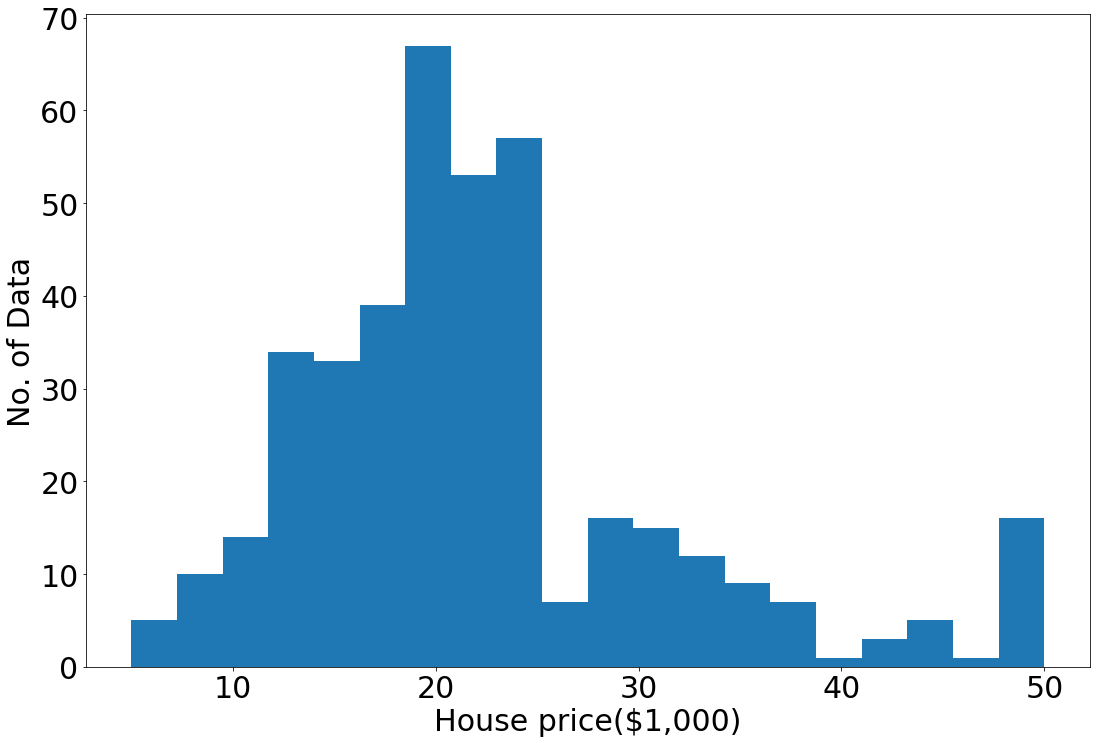

Text(0, 0.5, 'House price($1,000)')

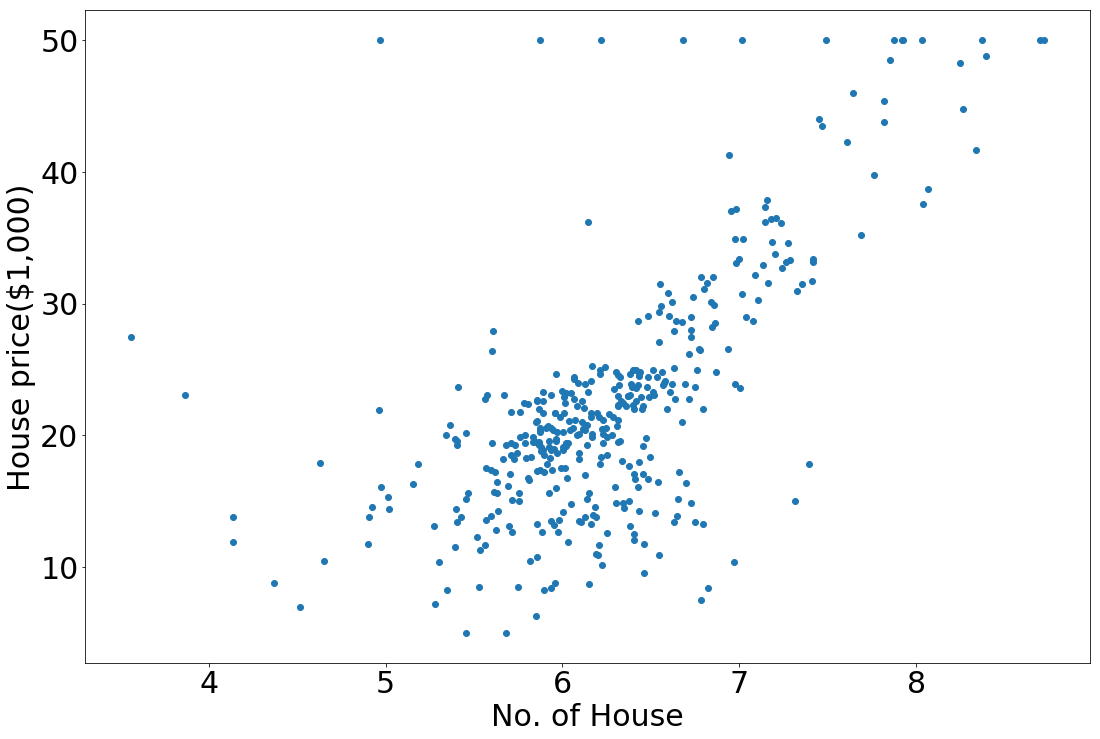

In [30]:
# matplotlibのグラフをインラインで表示する

%matplotlib inline

import matplotlib.pyplot as plt


plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = ['IPAexGothic']

plt.hist(y_train, bins=20)
plt.xlabel('House price($1,000)')
plt.ylabel('No. of Data')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('No. of House')
plt.ylabel('House price($1,000)')

## 標準偏差で割り前処理をする

Text(0, 0.5, 'House price(After Standardization)')

C:\Users\takumi\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


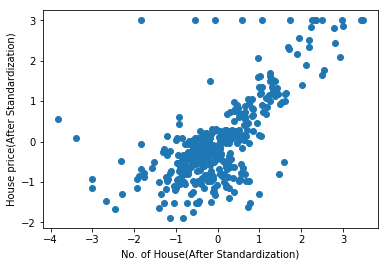

In [31]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std
# x_test に対しても x_train_mean と x_train_std を使う
x_test = (x_test - x_train_mean)/x_train_std
# y_test に対しても y_train_mean と y_train_std を使う
y_test = (y_test - y_train_mean)/y_train_std

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('No. of House(After Standardization)')
plt.ylabel('House price(After Standardization)')

## モデルの定義

In [32]:
import tensorflow as tf
# 説明変数用のプレースホルダー
x = tf.placeholder(tf.float32, (None, 13), name='x')
# 正解データ(住宅価格)用のプレースホルダー
y = tf.placeholder(tf.float32, (None, 1), name='y')

# 説明変数を重み w で足し合わせただけの簡単なモデル
w = tf.Variable(tf.random_normal((13,1)))
pred = tf.matmul(x, w)

In [33]:
# 実測値と推定値の差の二乗の平均を誤差とする
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        # train_step が None を返すので、_ で受けておく
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                x: x_train,
                # y_trainとyの次元をそろえるためにreshapeが必要
                y: y_train.reshape((-1, 1))
            }
        )
        print('step: {}, train_loss: {}'.format(
            step, train_loss
        ))
        
    # 学習が終わったら、評価用データに対して予測してみる
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

step: 0, train_loss: 13.528857231140137
step: 1, train_loss: 4.771350860595703
step: 2, train_loss: 3.2478842735290527
step: 3, train_loss: 2.4530301094055176
step: 4, train_loss: 1.9173603057861328
step: 5, train_loss: 1.5425347089767456
step: 6, train_loss: 1.2757973670959473
step: 7, train_loss: 1.0829486846923828
step: 8, train_loss: 0.9411832690238953
step: 9, train_loss: 0.8351133465766907
step: 10, train_loss: 0.7542605996131897
step: 11, train_loss: 0.6914296746253967
step: 12, train_loss: 0.6416391730308533
step: 13, train_loss: 0.6014140844345093
step: 14, train_loss: 0.5683090686798096
step: 15, train_loss: 0.540589451789856
step: 16, train_loss: 0.5170121788978577
step: 17, train_loss: 0.49667686223983765
step: 18, train_loss: 0.47892439365386963
step: 19, train_loss: 0.46326500177383423
step: 20, train_loss: 0.44933003187179565
step: 21, train_loss: 0.4368378221988678
step: 22, train_loss: 0.4255693256855011
step: 23, train_loss: 0.4153517186641693
step: 24, train_loss: 0.

In [35]:
import numpy as np

def get_batches(x, y, batch_size):
    n_data = len(x)
    indices  =np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 元データからランダムにbatch_size個ずつ抽出する
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

In [36]:
import tensorflow as tf
# ミニバッチのサイズ
BATCH_SIZE = 32

step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 100エポック回す
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x:x_batch,
                    y:y_batch.reshape((-1, 1))
                }
            )
            print('step: {}, train_loss: {}'.format(
                step, train_loss
            ))
            step += 1
            
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

step: 0, train_loss: 18.48301124572754
step: 1, train_loss: 4.875670433044434
step: 2, train_loss: 2.290757656097412
step: 3, train_loss: 1.952216625213623
step: 4, train_loss: 2.585315704345703
step: 5, train_loss: 1.2760423421859741
step: 6, train_loss: 2.624403476715088
step: 7, train_loss: 1.527998924255371
step: 8, train_loss: 1.0865867137908936
step: 9, train_loss: 1.0610361099243164
step: 10, train_loss: 1.181235671043396
step: 11, train_loss: 0.8082630038261414
step: 12, train_loss: 1.1616538763046265
step: 13, train_loss: 1.1405267715454102
step: 14, train_loss: 0.7702136039733887
step: 15, train_loss: 0.995344877243042
step: 16, train_loss: 0.8595459461212158
step: 17, train_loss: 0.6862205266952515
step: 18, train_loss: 0.6922389268875122
step: 19, train_loss: 0.3899683356285095
step: 20, train_loss: 0.34059786796569824
step: 21, train_loss: 0.573337733745575
step: 22, train_loss: 0.643718957901001
step: 23, train_loss: 0.6000826954841614
step: 24, train_loss: 0.626897692680

step: 239, train_loss: 0.29689615964889526
step: 240, train_loss: 0.50992751121521
step: 241, train_loss: 0.2209267020225525
step: 242, train_loss: 0.40522313117980957
step: 243, train_loss: 0.26926088333129883
step: 244, train_loss: 0.09371238946914673
step: 245, train_loss: 0.25477850437164307
step: 246, train_loss: 0.17295214533805847
step: 247, train_loss: 0.15761618316173553
step: 248, train_loss: 0.23189908266067505
step: 249, train_loss: 0.24606968462467194
step: 250, train_loss: 0.3922405242919922
step: 251, train_loss: 0.24190956354141235
step: 252, train_loss: 0.455710232257843
step: 253, train_loss: 0.26034456491470337
step: 254, train_loss: 0.16028034687042236
step: 255, train_loss: 0.3063695430755615
step: 256, train_loss: 0.32709604501724243
step: 257, train_loss: 0.3825627565383911
step: 258, train_loss: 0.273809015750885
step: 259, train_loss: 0.3371369540691376
step: 260, train_loss: 0.39270633459091187
step: 261, train_loss: 0.2444857805967331
step: 262, train_loss: 0

step: 474, train_loss: 0.1481378674507141
step: 475, train_loss: 0.12701541185379028
step: 476, train_loss: 0.41958048939704895
step: 477, train_loss: 0.557386040687561
step: 478, train_loss: 0.14548447728157043
step: 479, train_loss: 0.26695454120635986
step: 480, train_loss: 0.2771584689617157
step: 481, train_loss: 0.5766717195510864
step: 482, train_loss: 0.199286550283432
step: 483, train_loss: 0.347881555557251
step: 484, train_loss: 0.2236546277999878
step: 485, train_loss: 0.24216611683368683
step: 486, train_loss: 0.5462267398834229
step: 487, train_loss: 0.30460456013679504
step: 488, train_loss: 0.25694018602371216
step: 489, train_loss: 0.1671883761882782
step: 490, train_loss: 0.266602486371994
step: 491, train_loss: 0.3314938247203827
step: 492, train_loss: 0.11604523658752441
step: 493, train_loss: 0.19138002395629883
step: 494, train_loss: 0.17795246839523315
step: 495, train_loss: 0.12266519665718079
step: 496, train_loss: 0.42843133211135864
step: 497, train_loss: 0.3

step: 704, train_loss: 0.4036317765712738
step: 705, train_loss: 0.24066883325576782
step: 706, train_loss: 0.27702760696411133
step: 707, train_loss: 0.1804904192686081
step: 708, train_loss: 0.23366843163967133
step: 709, train_loss: 0.31596145033836365
step: 710, train_loss: 0.2305978685617447
step: 711, train_loss: 0.17218755185604095
step: 712, train_loss: 0.3018580675125122
step: 713, train_loss: 0.3469908833503723
step: 714, train_loss: 0.312407910823822
step: 715, train_loss: 0.18798457086086273
step: 716, train_loss: 0.10928915441036224
step: 717, train_loss: 0.1550605297088623
step: 718, train_loss: 0.2160484790802002
step: 719, train_loss: 0.39434778690338135
step: 720, train_loss: 0.21357093751430511
step: 721, train_loss: 0.5229197144508362
step: 722, train_loss: 0.1503760665655136
step: 723, train_loss: 0.24253994226455688
step: 724, train_loss: 0.46848928928375244
step: 725, train_loss: 0.42997604608535767
step: 726, train_loss: 0.6321413516998291
step: 727, train_loss: 

step: 948, train_loss: 0.44292837381362915
step: 949, train_loss: 0.30427926778793335
step: 950, train_loss: 0.1941952109336853
step: 951, train_loss: 0.3685704171657562
step: 952, train_loss: 0.336314857006073
step: 953, train_loss: 0.11336082965135574
step: 954, train_loss: 0.2290429174900055
step: 955, train_loss: 0.3299376368522644
step: 956, train_loss: 0.2657954692840576
step: 957, train_loss: 0.26212412118911743
step: 958, train_loss: 0.47209882736206055
step: 959, train_loss: 0.4629313349723816
step: 960, train_loss: 0.5255944728851318
step: 961, train_loss: 0.35763034224510193
step: 962, train_loss: 0.14348077774047852
step: 963, train_loss: 0.28344619274139404
step: 964, train_loss: 0.6470257043838501
step: 965, train_loss: 0.4115317165851593
step: 966, train_loss: 0.22974875569343567
step: 967, train_loss: 0.46816161274909973
step: 968, train_loss: 0.2060096710920334
step: 969, train_loss: 0.38998517394065857
step: 970, train_loss: 0.1321721076965332
step: 971, train_loss: 0

step: 1183, train_loss: 0.16958943009376526
step: 1184, train_loss: 0.2608400583267212
step: 1185, train_loss: 0.4366939067840576
step: 1186, train_loss: 0.46158015727996826
step: 1187, train_loss: 0.25084415078163147
step: 1188, train_loss: 0.24923861026763916
step: 1189, train_loss: 0.3377300500869751
step: 1190, train_loss: 0.21016544103622437
step: 1191, train_loss: 0.12945035099983215
step: 1192, train_loss: 0.1334744244813919
step: 1193, train_loss: 0.3479923903942108
step: 1194, train_loss: 0.1767752468585968
step: 1195, train_loss: 0.5415130853652954
step: 1196, train_loss: 0.5139235854148865
step: 1197, train_loss: 0.25190427899360657
step: 1198, train_loss: 0.2149699628353119
step: 1199, train_loss: 0.21421663463115692
step: 1200, train_loss: 0.3160797357559204
step: 1201, train_loss: 0.15403102338314056
step: 1202, train_loss: 0.16838809847831726
step: 1203, train_loss: 0.5710435509681702
step: 1204, train_loss: 0.49656087160110474
step: 1205, train_loss: 0.11668074131011963